In [1]:
import numpy as np
import pandas as pd

##  Importing the dataset

In [2]:
waterdf = pd.read_csv("../dataset/water_potability.csv")

In [3]:
waterdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [4]:
waterdf.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


## Visualisation

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

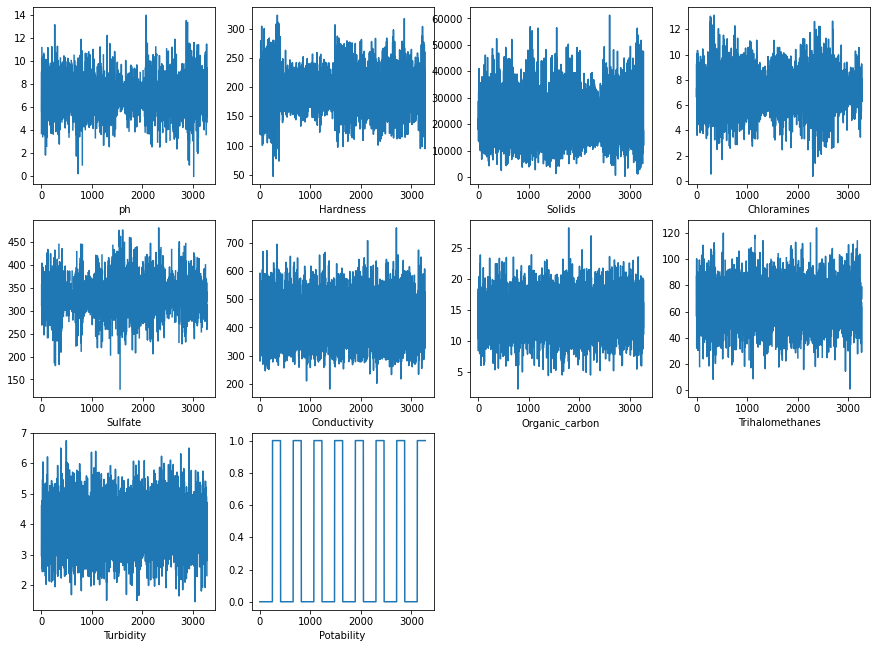

In [6]:
plt.figure(figsize=(15, 15))

cols = waterdf.columns
for i in range(10):
    plt.subplot(4,4,i+1)
    plt.xlabel(cols[i])
    waterdf[cols[i]].plot()


#### With this visualisation, we can see that all columns can be used for the training because there have a great influence on the output

## Preprocessing

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [8]:
y = waterdf.Potability
X = waterdf.drop(['Potability'], axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=0)

In [9]:
my_imputer = SimpleImputer()
impute_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
impute_X_valid = pd.DataFrame(my_imputer.transform(X_valid))
impute_X_train.columns = X_train.columns
impute_X_valid.columns = X_valid.columns

## Modeling

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [11]:
model = LogisticRegression(solver='liblinear', penalty='l1')
model.fit(impute_X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [12]:
y_pred = model.predict(impute_X_valid)
accuracy = accuracy_score(y_valid, y_pred)
print("Model accuracy = {:.2f}%".format(accuracy * 100))

Model accuracy = 62.26%
